**Checking for the current working directory and copying the path of file**


In [ ]:
!pwd

/content


In [ ]:
!cp '/content/drive/MyDrive/project_dl/pavement.zip' ./

**Unzip the dataset**

In [ ]:
!unzip pavement.zip

Archive:  pavement.zip
replace Negative/00001.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
# Moving the unzip files to a new folder

In [ ]:
!mv Positive '/content/drive/MyDrive/unzip_pavement'
!mv Negative '/content/drive/MyDrive/unzip_pavement'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense

In [ ]:
dataset_path='/content/drive/MyDrive/unzip_pavement'

In [ ]:
batch_size=64
image_size=(150,150)
epochs=10

In [ ]:
train_datagen=ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

In [ ]:
training_generator=train_datagen.flow_from_directory(
    dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

Found 24000 images belonging to 2 classes.


In [ ]:
validation_generator=train_datagen.flow_from_directory(
    dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

Found 6000 images belonging to 2 classes.


In [ ]:
model=Sequential()

model.add(Conv2D(32,(3,3),activation='relu',input_shape=(image_size[0],image_size[1],3)))

model.add(MaxPool2D(2,2))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
history=model.fit(
    training_generator,
    steps_per_epoch=training_generator.samples//batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples//batch_size,
    epochs=epochs
)

Epoch 1/10
375/375 [==============================] - 316s 838ms/step - loss: 0.5412 - accuracy: 0.8232 - val_loss: 0.3527 - val_accuracy: 0.8280
Epoch 2/10
375/375 [==============================] - 133s 355ms/step - loss: 0.2200 - accuracy: 0.9156 - val_loss: 0.2248 - val_accuracy: 0.8936
Epoch 3/10
375/375 [==============================] - 136s 362ms/step - loss: 0.1518 - accuracy: 0.9408 - val_loss: 0.1454 - val_accuracy: 0.9303
Epoch 4/10
375/375 [==============================] - 114s 303ms/step - loss: 0.1180 - accuracy: 0.9559 - val_loss: 0.1145 - val_accuracy: 0.9609
Epoch 5/10
375/375 [==============================] - 134s 356ms/step - loss: 0.1118 - accuracy: 0.9565 - val_loss: 0.1635 - val_accuracy: 0.9266
Epoch 6/10
375/375 [==============================] - 116s 309ms/step - loss: 0.0929 - accuracy: 0.9630 - val_loss: 0.1667 - val_accuracy: 0.9350
Epoch 7/10
375/375 [==============================] - 135s 359ms/step - loss: 0.0870 - accuracy: 0.9665 - val_loss: 0.2108 -

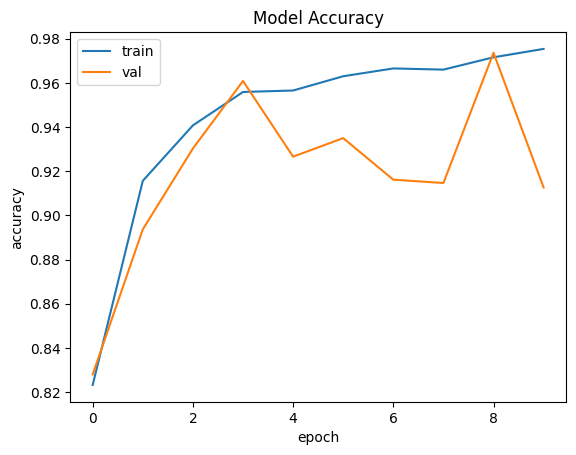

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.title('Model Accuracy')
plt.legend(['train','val'],loc='upper left')
plt.show()

In [ ]:
model.save('Pavement_crack_detection.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


**Transferred the model to another destination**

In [ ]:
!cp /content/Pavement_crack_detection.h5 /content/drive/MyDrive/Deep_Learning

In [ ]:
!cp /content/drive/MyDrive/Deep_Learning/Pavement_crack_detection.h5 ./

In [ ]:
from tensorflow.keras.preprocessing import image
#Loading Model
model1=tf.keras.models.load_model('Pavement_crack_detection.h5')
#Loading a new image for detection
img=image.load_img('/content/crack_img.jpeg',target_size=(150,150))

#Preprocessing for new image prediction
#1. Converting to Array
img=image.img_to_array(img)
#2.Expanding dimension to match with the model( converting to 4D )
img=np.expand_dims(img,axis=0)
#3. Normalising
img/=255.0

prediction=model.predict(img)
if prediction>0.5:
  print("Cracked Pavement")
else:
  print("Not Cracked")
print(prediction)


1/1 [==============================] - 0s 208ms/step
[[0.9999999]]
